In [1]:
# All imports
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import operator
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold

%matplotlib inline

In [2]:
df = pd.read_csv('clean_datasets/train_final.csv', index_col=0)
df.tail()

,Year,Month,Sales(In ThousandDollars),Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,ProductCategory_OtherClothing,ProductCategory_WomenClothing
211,2014,11,803.0,17765.337570,16243.054734,259.382,5.8,11.99,10.47,24.78,67.53,-3.99,10.818,9.692,783.0,15.819,3.775,9.45,0,0
212,2014,11,1468.0,17765.337570,16243.054734,259.382,5.8,11.99,10.47,24.78,67.53,-3.99,10.818,9.692,783.0,15.819,3.775,9.45,1,0
213,2014,12,5664.0,17733.024464,16221.180125,258.080,5.6,11.99,10.47,24.59,68.30,1.14,10.818,9.692,760.0,15.345,3.775,9.45,0,1
214,2014,12,1070.0,17733.024464,16221.180125,258.080,5.6,11.99,10.47,24.59,68.30,1.14,10.818,9.692,760.0,15.345,3.775,9.45,0,0
215,2014,12,1967.0,17733.024464,16221.180125,258.080,5.6,11.99,10.47,24.59,68.30,1.14,10.818,9.692,760.0,15.345,3.775,9.45,1,0


In [3]:
test_features = pd.read_csv('clean_datasets/test_final.csv', index_col=0)
test_features.tail()

,Year,Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,ProductCategory_OtherClothing,ProductCategory_WomenClothing
31,2015,11,18266.244605,16524.199494,261.009,5.0,12.22,9.66,25.38,69.22,0.28,8.398,7.995,770.0,12.83,3.675,9.7,0,0
32,2015,11,18266.244605,16524.199494,261.009,5.0,12.22,9.66,25.38,69.22,0.28,8.398,7.995,770.0,12.83,3.675,9.7,1,0
33,2015,12,18317.129125,16578.004544,259.941,5.0,12.22,9.66,25.21,70.39,1.69,8.398,7.995,755.0,12.58,3.675,9.5,0,1
34,2015,12,18317.129125,16578.004544,259.941,5.0,12.22,9.66,25.21,70.39,1.69,8.398,7.995,755.0,12.58,3.675,9.5,0,0
35,2015,12,18317.129125,16578.004544,259.941,5.0,12.22,9.66,25.21,70.39,1.69,8.398,7.995,755.0,12.58,3.675,9.5,1,0


---
## Splitting Dataset into features and target:

In [4]:
features = df.drop('Sales(In ThousandDollars)', axis=1)
target = df['Sales(In ThousandDollars)']

In [5]:
features.tail()

,Year,Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,ProductCategory_OtherClothing,ProductCategory_WomenClothing
211,2014,11,17765.337570,16243.054734,259.382,5.8,11.99,10.47,24.78,67.53,-3.99,10.818,9.692,783.0,15.819,3.775,9.45,0,0
212,2014,11,17765.337570,16243.054734,259.382,5.8,11.99,10.47,24.78,67.53,-3.99,10.818,9.692,783.0,15.819,3.775,9.45,1,0
213,2014,12,17733.024464,16221.180125,258.080,5.6,11.99,10.47,24.59,68.30,1.14,10.818,9.692,760.0,15.345,3.775,9.45,0,1
214,2014,12,17733.024464,16221.180125,258.080,5.6,11.99,10.47,24.59,68.30,1.14,10.818,9.692,760.0,15.345,3.775,9.45,0,0
215,2014,12,17733.024464,16221.180125,258.080,5.6,11.99,10.47,24.59,68.30,1.14,10.818,9.692,760.0,15.345,3.775,9.45,1,0


In [6]:
target.tail()

211     803.0
212    1468.0
213    5664.0
214    1070.0
215    1967.0
Name: Sales(In ThousandDollars), dtype: float64

---

# Feature Selection / Feature Elimination

---

## Recursive Feature Elimination Method:

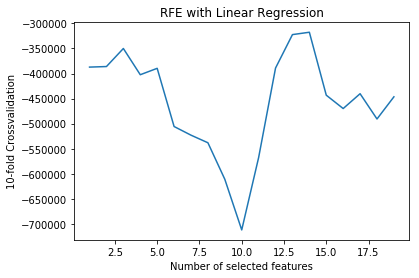

rfecv.grid_scores_: [-387211.29110526 -386082.68585403 -350092.2694046  -402412.33317627
 -389648.28438506 -505737.0965037  -523002.03038834 -538138.5468419
 -611020.59646996 -712034.81045456 -567623.2551524  -389089.13391019
 -322352.81881096 -317658.78142398 -443238.19486857 -469873.2588839
 -440301.68104961 -490711.22391555 -446494.62956934]
rfecv.support_: [ True  True False False  True  True  True  True  True False  True  True
  True False False  True  True  True  True]

The most suitable features for prediction: [('Year', True), ('Month', True), ('CPI', True), ('unemployment rate', True), ('CommercialBankInterestRateonCreditCardPlans', True), ('Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan', True), ('Earnings or wages  in dollars per hour', True), ('Change(in%)', True), ('Average upland planted(million acres)', True), ('Average upland harvested(million acres)', True), ('Mill use  (in  480-lb netweright in million bales)', True), ('Exports', True), ('ProductCat

In [7]:
linreg_model = LinearRegression()
feature_names = features.columns

rfecv = RFECV(
    estimator=linreg_model,
    step=1,
    cv= 5,
    scoring='neg_mean_squared_error',
)
rfecv.fit(features, target)

plt.figure()
plt.title('RFE with Linear Regression')
plt.xlabel('Number of selected features')
plt.ylabel('10-fold Crossvalidation')

# grid_scores_ returns a list of accuracy scores
# for each of the features selected
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

plt.show()

print('rfecv.grid_scores_: {grid_scores}'.format(grid_scores=rfecv.grid_scores_))

# support_ is another attribute to find out the features
# which contribute the most to predicting
new_features = list(filter(
    lambda x: x[1],
    zip(feature_names, rfecv.support_)
))





print('rfecv.support_: {support}'.format(support=rfecv.support_))

# Features are the most suitable for predicting the response class
new_features_rfecv = list(map(operator.itemgetter(0), new_features))
print('\nThe most suitable features for prediction: {new_features}'.format(new_features=new_features))

In [8]:
new_features_rfecv

['Year',
 'Month',
 'CPI',
 'unemployment rate',
 'CommercialBankInterestRateonCreditCardPlans',
 'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
 'Earnings or wages  in dollars per hour',
 'Change(in%)',
 'Average upland planted(million acres)',
 'Average upland harvested(million acres)',
 'Mill use  (in  480-lb netweright in million bales)',
 'Exports',
 'ProductCategory_OtherClothing',
 'ProductCategory_WomenClothing']

In [9]:
features_total = features.append(test_features, ignore_index=True)
features_total

,Year,Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,ProductCategory_OtherClothing,ProductCategory_WomenClothing
0,2009,1,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799.0,12.589,4.170,11.550,0,1
1,2009,1,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799.0,12.589,4.170,11.550,0,0
2,2009,1,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799.0,12.589,4.170,11.550,1,0
3,2009,2,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799.0,12.589,3.870,11.100,0,1
4,2009,2,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799.0,12.589,3.870,11.100,0,0
5,2009,2,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799.0,12.589,3.870,11.100,1,0
6,2009,3,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799.0,12.589,3.720,11.650,0,1
7,2009,3,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799.0,12.589,3.720,11.650,0,0
8,2009,3,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799.0,12.589,3.720,11.650,1,0
9,2009,4,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,7.559,787.0,12.400,3.620,12.225,0,1


In [10]:
features_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
Year                                                                 252 non-null int64
Month                                                                252 non-null int64
Monthly Nominal GDP Index (inMillion$)                               252 non-null float64
Monthly Real GDP Index (inMillion$)                                  252 non-null float64
CPI                                                                  252 non-null float64
unemployment rate                                                    252 non-null float64
CommercialBankInterestRateonCreditCardPlans                          252 non-null float64
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    252 non-null float64
Earnings or wages  in dollars per hour                               252 non-null float64
Cotton Monthly Price - US cents per Pound(lbs)                       252 non-null float64

In [11]:
# Dropping features based on new_features_rfecv on features_total
features_total = features_total[new_features_rfecv]
features_total

,Year,Month,CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Change(in%),Average upland planted(million acres),Average upland harvested(million acres),Mill use (in 480-lb netweright in million bales),Exports,ProductCategory_OtherClothing,ProductCategory_WomenClothing
0,2009,1,233.402,7.8,12.03,11.44,22.05,4.02,9.296,7.559,4.170,11.550,0,1
1,2009,1,233.402,7.8,12.03,11.44,22.05,4.02,9.296,7.559,4.170,11.550,0,0
2,2009,1,233.402,7.8,12.03,11.44,22.05,4.02,9.296,7.559,4.170,11.550,1,0
3,2009,2,234.663,8.3,12.97,11.05,22.22,-4.32,9.296,7.559,3.870,11.100,0,1
4,2009,2,234.663,8.3,12.97,11.05,22.22,-4.32,9.296,7.559,3.870,11.100,0,0
5,2009,2,234.663,8.3,12.97,11.05,22.22,-4.32,9.296,7.559,3.870,11.100,1,0
6,2009,3,235.067,8.7,12.97,11.05,22.22,-6.72,9.296,7.559,3.720,11.650,0,1
7,2009,3,235.067,8.7,12.97,11.05,22.22,-6.72,9.296,7.559,3.720,11.650,0,0
8,2009,3,235.067,8.7,12.97,11.05,22.22,-6.72,9.296,7.559,3.720,11.650,1,0
9,2009,4,235.582,9.0,12.97,11.05,22.13,10.25,9.296,7.559,3.620,12.225,0,1


---

## Data Standardization:


In [12]:
from sklearn.preprocessing import StandardScaler

features_standard = StandardScaler().fit_transform(features_total)
features_standard = pd.DataFrame(features_standard)
features_standard.columns = features_total.columns
features_standard.tail()

/Library/Frameworks/Python.framework/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Year,Month,CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Change(in%),Average upland planted(million acres),Average upland harvested(million acres),Mill use (in 480-lb netweright in million bales),Exports,ProductCategory_OtherClothing,ProductCategory_WomenClothing
247,1.5,1.303572,1.159245,-1.804886,-0.427765,-1.747691,1.929242,-0.037145,-1.41859,-0.769822,0.695277,-0.854296,-0.707107,-0.707107
248,1.5,1.303572,1.159245,-1.804886,-0.427765,-1.747691,1.929242,-0.037145,-1.41859,-0.769822,0.695277,-0.854296,1.414214,-0.707107
249,1.5,1.593255,1.037946,-1.804886,-0.427765,-1.747691,1.752131,0.158211,-1.41859,-0.769822,0.695277,-0.969376,-0.707107,1.414214
250,1.5,1.593255,1.037946,-1.804886,-0.427765,-1.747691,1.752131,0.158211,-1.41859,-0.769822,0.695277,-0.969376,-0.707107,-0.707107
251,1.5,1.593255,1.037946,-1.804886,-0.427765,-1.747691,1.752131,0.158211,-1.41859,-0.769822,0.695277,-0.969376,1.414214,-0.707107


---
## Regression Analysis without PCA:

In [13]:
features_train = features_standard[:216]
features_test = features_standard[216:]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(features_train, target, test_size=0.2, random_state=2, shuffle=True)

---
## Linear Regression:

In [15]:
# Training the model
model = LinearRegression()
model.fit(features_train, target)

# Making predictions
y_pred = model.predict(features_test)
y_pred

array([3688.41472304, 1183.54666748, 1592.88694526, 3702.55585376,
       1197.68779821, 1607.02807598, 3812.97629195, 1308.1082364 ,
       1717.44851418, 3881.81606806, 1376.94801251, 1786.28829029,
       3926.09993664, 1421.23188109, 1830.57215887, 3944.42343687,
       1439.55538131, 1848.89565909, 4061.34307282, 1556.47501727,
       1965.81529505, 4197.08451064, 1692.21645508, 2101.55673286,
       4225.02499027, 1720.15693472, 2129.4972125 , 4311.65164865,
       1806.78359309, 2216.12387087, 4395.03930403, 1890.17124847,
       2299.51152625, 4586.80300764, 2081.93495208, 2491.27522986])

In [16]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=model,
                         X=features_train,
                         y=target,
                         cv=5,
                         n_jobs=1, scoring='neg_mean_squared_error')
print(f'CV Negative RMSE scores: {np.sqrt(-scores)}')
print('CV  Negative RMSE: %.3f +/- %.3f' % (np.mean(np.sqrt(-scores)), np.std(np.sqrt(-scores))))

CV Negative RMSE scores: [581.15650236 487.78080658 536.85242369 491.46180063 613.29642006]
CV  Negative RMSE: 542.110 +/- 49.268


In [17]:
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,3688.414723
1,1183.546667
2,1592.886945
3,3702.555854
4,1197.687798
5,1607.028076
6,3812.976292
7,1308.108236
8,1717.448514
9,3881.816068


In [18]:
# File to submit to Kaggle
y_pred.to_csv('output_files/Sales_linreg.csv')

#### RMSE in train: 542.110 +/- 49.268
#### RMSE in test: 859.24801

*** Therefore the basic linear regression model is overfitting to the dataset. 

---
## Ridge and Lasso Linear Regression for Regularization:

In [19]:
# from sklearn.linear_model import Ridge

# def fit_lasso(X, y):
#     model = Lasso(normalize=True)

#     params = {'alpha': [1, 0.5, 0.1, 0.01, 0.005, 0.004, 0.003, 0.002, 0.001]}

#     grid = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=5)

#     grid.fit(features_train, target )
#     return grid.best_estimator_

# def fit_Ridge(X, y):
#     model = Ridge(normalize=True)

#     params = {'alpha': [1, 0.5, 0.1, 0.01, 0.005, 0.004, 0.003, 0.002, 0.001]}

#     grid = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=5)

#     grid.fit(features_train, target)
#     return grid.best_estimator_

In [20]:
# # Fit the training data to the model using grid search
# lasso = fit_lasso(features_train, target)
# lasso.best_params_

In [21]:
# lasso.best_params

---
## Decision Trees

In [22]:
# Decision Trees
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

def fit_dt(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """

    regressor = DecisionTreeRegressor(max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=42)
    params = {'max_features':['auto', 'sqrt', 'log2', None], 'splitter': ['best', 'random'], 'criterion': ['mse', 'mae', 'friedman_mse']}
#     params = {'max_depth': list(np.arange(1, 10)), 'min_samples_leaf':list(np.arange(1, 10)), 'min_samples_split':list(np.arange(2, 10))}

    grid = GridSearchCV(regressor, params, scoring='neg_mean_squared_error', cv=5)

    grid_fit = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid_fit.best_estimator_

In [23]:
# Fit the training data to the model using grid search
model = fit_dt(features_train, target)

print(model.get_params())

{'criterion': 'mae', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 42, 'splitter': 'best'}


/Library/Frameworks/Python.framework/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [24]:
# Training the model
# model = DecisionTreeRegressor(max_depth=3, min_samples_split=2, min_samples_leaf=1) # Best model values
model = DecisionTreeRegressor(criterion = 'mae', splitter='best', max_features='auto', max_depth=3, min_samples_split=2, min_samples_leaf=1)
model.fit(features_train, target)

# Making predictions
y_pred_dt = model.predict(features_test)

In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=model,
                         X=features_train,
                         y=target,
                         cv=5,
                         n_jobs=1, scoring='neg_mean_squared_error')
print(f'CV Negative RMSE scores: {np.sqrt(-scores)}')
print('CV  Negative RMSE: %.3f +/- %.3f' % (np.mean(np.sqrt(-scores)), np.std(np.sqrt(-scores))))

CV Negative RMSE scores: [506.00276791 429.7847149  484.47910772 654.65923143 530.11124875]
CV  Negative RMSE: 521.007 +/- 74.601


In [26]:
y_pred_dt = pd.DataFrame(y_pred_dt)
y_pred_dt

,0
0,4503.0
1,649.0
2,1165.0
3,4503.0
4,649.0
5,1165.0
6,4503.0
7,649.0
8,1165.0
9,4503.0


In [27]:
# File to submit to Kaggle
y_pred_dt.to_csv('output_files/Sales_dt.csv')

#### DT model using RFECV without PCA has RMSE of 587.28617. 
#### Best Model Yet!
---

## Random Forest Regression:

In [28]:
from sklearn.ensemble import RandomForestRegressor

### Hyperparameter Tuning using GridSearchCV:

In [29]:
def fit_rf(X, y):
    regressor = RandomForestRegressor(random_state=1, n_jobs=-1, n_estimators=300, max_depth=4, min_samples_split=3, min_samples_leaf=1)
    params = {'max_features' : ['auto','sqrt' , 'log2']}
    grid = GridSearchCV(regressor, params, scoring='neg_mean_squared_error', cv=5)

    grid_fit = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid_fit.best_estimator_

In [30]:
# Fit the training data to the model using grid search
model = fit_rf(features_train, target)

# Produce the value for 'n_estimators', 'max_depth', 'min_samples_split' and 'min_samples_leaf'
print(model.get_params())

/Library/Frameworks/Python.framework/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'bootstrap': True, 'criterion': 'mse', 'max_depth': 4, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [31]:
print("Parameter 'n_estimators' is {} for the optimal model.".format(model.get_params()['n_estimators']))
print("Parameter 'max_depth' is {} for the optimal model.".format(model.get_params()['max_depth']))
print("Parameter 'min_samples_split' is {} for the optimal model.".format(model.get_params()['min_samples_split']))
print("Parameter 'min_samples_leaf' is {} for the optimal model.".format(model.get_params()['min_samples_leaf']))

Parameter 'n_estimators' is 300 for the optimal model.
Parameter 'max_depth' is 4 for the optimal model.
Parameter 'min_samples_split' is 3 for the optimal model.
Parameter 'min_samples_leaf' is 1 for the optimal model.


### Hyperparameter Tuning using RandomizedSearchCV:

In [32]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [33]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(features_train, target)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min


KeyboardInterrupt: 

In [ ]:
rf_random.best_params_

In [ ]:
model = RandomForestRegressor(random_state=1, n_jobs=-1, n_estimators=400, max_depth=20, min_samples_split=10, min_samples_leaf=4, bootstrap=True)
model.fit(features_train, target)

# Making predictions
y_pred_rf = model.predict(features_test)
# Test RMSE: 609.03667

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=model,
                         X=features_train,
                         y=target,
                         cv=5,
                         n_jobs=1, scoring='neg_mean_squared_error')
print(f'CV Negative RMSE scores: {np.sqrt(-scores)}')
print('CV  Negative RMSE: %.3f +/- %.3f' % (np.mean(np.sqrt(-scores)), np.std(np.sqrt(-scores))))

In [ ]:
y_pred_rf = pd.DataFrame(y_pred_rf)
y_pred_rf

In [ ]:
# File to submit to Kaggle
y_pred_rf.to_csv('output_files/Sales_rf.csv')
# Test RMSE: 609.03667

## PCA using Scikit-Learn:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
features_pca = pca.fit_transform(features_standard)
features_pca

In [ ]:
pca.explained_variance_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
# Cumulative Sum of explained Variance
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Elbow Curve')

In [ ]:
def pca_features(n):
    pca = PCA(n_components=n)
    features_pca = pca.fit_transform(features_standard)
    return (features_pca[0:216], features_pca[216: ])

In [ ]:
features_train, features_test  = pca_features(7)

## Splitting features using train_test_split for model evaluation:

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(features_train, target, test_size=0.2, random_state=2, shuffle=True)

---

## Kaggle Submission:

In [ ]:
model = LinearRegression().fit(features_train, target)
y_predict = model.predict(features_test)
y_predict = pd.DataFrame(y_predict)
y_predict

In [ ]:
# File to submit to Kaggle
y_predict.to_csv('output_files/Sales_linreg_pca.csv')